<a href="https://colab.research.google.com/github/MARVINTIEGO/AAI-2026/blob/ML-EXERCISE-ASSIGNMENT/ML_Coding_Assignment_PART_1%2C2%2C3_N_EXTRA_CREDIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =========================
# LOAD DATA
# =========================
# Data source: Dataset generated using ChatGPT (200 housing records)

df = pd.read_csv("housing_data.csv")

# =========================
# DEFINE FEATURES & TARGET
# =========================
X = df[['square_footage', 'location']]
y = df['price']

# =========================
# PREPROCESSING
# =========================
preprocessor = ColumnTransformer(
    transformers=[
        ('location', OneHotEncoder(handle_unknown='ignore'), ['location'])
    ],
    remainder='passthrough'  # keeps square_footage
)

# =========================
# PIPELINE
# =========================
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# =========================
# TRAIN / TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =========================
# TRAIN MODEL
# =========================
model.fit(X_train, y_train)

# =========================
# EVALUATE MODEL (Improvement)
# =========================
y_pred = model.predict(X_test)

print("Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

print("R^2:", r2_score(y_test, y_pred))


# =========================
# PREDICT NEW HOUSE
# =========================
new_house = pd.DataFrame({
    'square_footage': [2000],
    'location': ['Downtown']
})

predicted_price = model.predict(new_house)

print(f"\nPredicted price for a 2000 sq ft house in Downtown: ${predicted_price[0]:,.2f}")

# =========================
# DISPLAY COEFFICIENTS
# =========================
ohe = model.named_steps['preprocessor'].named_transformers_['location']
location_features = ohe.get_feature_names_out(['location']).tolist()
feature_names = location_features + ['square_footage']

coefficients = model.named_steps['regressor'].coef_

print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")


Model Evaluation:
MAE: 28409.303589043593
RMSE: 39088.90552424007
R^2: 0.9614270936175872

Predicted price for a 2000 sq ft house in Downtown: $620,419.84

Model Coefficients:
location_Downtown: 165297.05
location_Rural: -150629.34
location_Suburb: -14667.71
square_footage: 222.79


Explanation Part 1
The square_footage coefficient represents how much the house price increases for each additional square foot, assuming the location stays the same. For example, if the coefficient is around 220, it means that for every extra square foot, the predicted price increases by approximately $220.
The location variable is encoded using OneHotEncoder, meaning each location (Downtown, Suburb, Rural) has its own coefficient. These coefficients adjust the price up or down compared to the baseline location. A positive coefficient means that location increases the predicted price, while a negative coefficient means it decreases the predicted price. This shows that Downtown homes are generally more expensive than Suburb or Rural homes.


In [ ]:
# ====================================================
# PART 2: CUSTOMER CHURN PREDICTION (LOGISTIC REGRESSION)
# ====================================================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# =========================
# LOAD DATA
# =========================
# Data source: Dataset generated using ChatGPT (300 churn records)
churn_df = pd.read_csv("churn_data.csv")

# =========================
# FEATURES & TARGET
# =========================
X = churn_df[["age", "monthly_usage", "purchase_amount", "customer_service_calls", "region"]]
y = churn_df["churn"]

numeric_features = ["age", "monthly_usage", "purchase_amount", "customer_service_calls"]
categorical_features = ["region"]

# =========================
# PREPROCESSING
# =========================
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# =========================
# PIPELINE + MODEL
# =========================
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logreg", LogisticRegression(max_iter=2000))
])

# =========================
# TRAIN / TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# TRAIN
# =========================
model.fit(X_train, y_train)

# =========================
# PREDICT PROBABILITY + CLASSIFY (0.5 threshold)
# =========================
new_customer = pd.DataFrame([{
    "age": 45,
    "monthly_usage": 20,
    "purchase_amount": 50,
    "customer_service_calls": 4,
    "region": "West"
}])

churn_prob = model.predict_proba(new_customer)[0, 1]
churn_class = int(churn_prob >= 0.5)

print("New Customer Prediction:")
print(f"Churn probability: {churn_prob:.3f}")
print(f"At-risk (threshold=0.5): {churn_class}")

# =========================
# EVALUATION (Improvement)
# =========================
test_probs = model.predict_proba(X_test)[:, 1]
test_pred = (test_probs >= 0.5).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_pred))

print("\nClassification Report:")
print(classification_report(y_test, test_pred, digits=3))

# =========================
# COEFFICIENTS
# =========================
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_names = ohe.get_feature_names_out(categorical_features).tolist()
feature_names = numeric_features + cat_names

coefs = model.named_steps["logreg"].coef_[0]
coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coefs}).sort_values(
    by="coefficient", ascending=False
)

print("\nModel Coefficients (positive => higher churn likelihood):")
print(coef_df.to_string(index=False))


New Customer Prediction:
Churn probability: 0.434
At-risk (threshold=0.5): 0

Confusion Matrix:
[[58  0]
 [ 2  0]]

Classification Report:
              precision    recall  f1-score   support

           0      0.967     1.000     0.983        58
           1      0.000     0.000     0.000         2

    accuracy                          0.967        60
   macro avg      0.483     0.500     0.492        60
weighted avg      0.934     0.967     0.950        60


Model Coefficients (positive => higher churn likelihood):
               feature  coefficient
customer_service_calls     1.544232
      region_Northeast     0.411145
                   age     0.361721
          region_South     0.053723
           region_West    -0.145828
        region_Midwest    -0.318783
         monthly_usage    -0.445794
       purchase_amount    -0.579703


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Part 2
The model predicted a churn probability of 0.434 (43.4%) for the new customer, meaning there is a 43.4% chance the customer will stop doing business.
I used a 0.5 threshold to classify churn. Since 0.434 is less than 0.5, the customer is classified as not at risk.
Businesses can use churn predictions to identify customers who may leave and offer retention strategies such as discounts, loyalty rewards, or proactive support to reduce

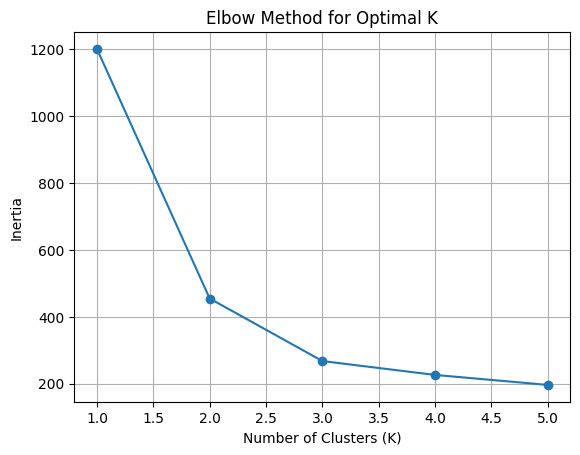

Cluster Summary:
         annual_spending  purchase_frequency    age
cluster                                            
0                 954.33                6.59  27.77
1                6203.41               22.33  52.11
2                2568.05               14.65  43.41

Cluster results saved as customer_clusters.csv


In [ ]:
# ====================================================
# PART 3: CUSTOMER SEGMENTATION (K-MEANS)
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# =========================
# LOAD DATA
# =========================
# Data source: Dataset generated using ChatGPT (400 customer records)

segment_df = pd.read_csv("segmentation_data.csv")

# =========================
# SELECT NUMERICAL FEATURES
# =========================
features = ["annual_spending", "purchase_frequency", "age"]
X = segment_df[features]

# =========================
# SCALE DATA
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# ELBOW METHOD
# =========================
inertia_values = []
K_range = range(1, 6)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

# =========================
# APPLY K-MEANS (K=3)
# =========================
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
segment_df["cluster"] = kmeans_final.fit_predict(X_scaled)

# =========================
# CLUSTER ANALYSIS
# =========================
cluster_summary = segment_df.groupby("cluster")[features].mean().round(2)

print("Cluster Summary:")
print(cluster_summary)

# =========================
# SAVE RESULTS
# =========================
segment_df.to_csv("customer_clusters.csv", index=False)
print("\nCluster results saved as customer_clusters.csv")




Part 3: Cluster Analysis & Marketing Strategy
Using the elbow method, K = 3 was selected because the inertia decreases sharply up to 3 clusters and then begins to level off, indicating that three clusters capture the main customer segments.
Based on the cluster averages:
•	Cluster 0 consists of younger customers with low annual spending (~$954) and low purchase frequency (~6.6). These are lower-value or less engaged customers.
•	Cluster 1 includes older customers with very high annual spending (~$6203) and high purchase frequency (~22.3). These are high-value, loyal customers.
•	Cluster 2 represents middle-aged customers with moderate spending (~$2568) and moderate purchase frequency (~14.6). These are mid-tier customers.
Marketing strategies:
•	For Cluster 0, offer discounts and engagement campaigns to increase activity.
•	For Cluster 2, use cross-selling and bundle promotions to increase spending.
•	For Cluster 1, provide VIP rewards and loyalty programs to retain high-value customers.


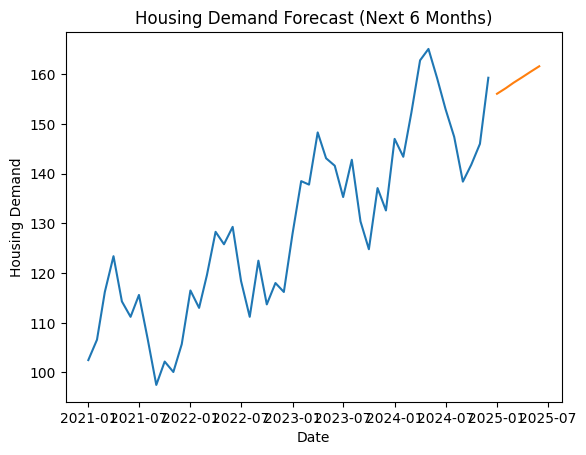

6-Month Forecast:
        date  forecast_demand
0 2025-01-01       156.076596
1 2025-02-01       157.183038
2 2025-03-01       158.289481
3 2025-04-01       159.395924
4 2025-05-01       160.502366
5 2025-06-01       161.608809


In [ ]:
# ====================================================
# EXTRA CREDIT: HOUSING DEMAND FORECASTING
# ====================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# =========================
# LOAD DATA
# =========================
# Data source: Dataset generated using ChatGPT (48 months housing demand)

demand_df = pd.read_csv("housing_demand.csv")

# Convert date column
demand_df["date"] = pd.to_datetime(demand_df["date"])
demand_df = demand_df.sort_values("date")

# =========================
# FEATURE ENGINEERING
# =========================
demand_df["t"] = np.arange(len(demand_df))  # time index

X = demand_df[["t"]]
y = demand_df["demand"]

# =========================
# TRAIN MODEL
# =========================
model = LinearRegression()
model.fit(X, y)

# =========================
# FORECAST NEXT 6 MONTHS
# =========================
future_periods = 6
future_t = np.arange(len(demand_df), len(demand_df) + future_periods)

future_dates = pd.date_range(
    start=demand_df["date"].max() + pd.DateOffset(months=1),
    periods=future_periods,
    freq="MS"
)

future_df = pd.DataFrame({
    "date": future_dates,
    "t": future_t
})

future_df["forecast_demand"] = model.predict(future_df[["t"]])

# =========================
# VISUALIZATION (ONE PLOT ONLY)
# =========================
plt.figure()
plt.plot(demand_df["date"], demand_df["demand"])
plt.plot(future_df["date"], future_df["forecast_demand"])
plt.xlabel("Date")
plt.ylabel("Housing Demand")
plt.title("Housing Demand Forecast (Next 6 Months)")
plt.show()

# =========================
# PRINT FORECAST
# =========================
print("6-Month Forecast:")
print(future_df[["date", "forecast_demand"]])


Extra Credit: Housing Demand Forecasting
I loaded historical housing demand data from a CSV file and trained a Linear Regression model using a time index (t) to capture the overall trend. The model forecasts demand for the next 6 months, producing predicted demand values from 156.08 to 161.61.
Assumptions: demand follows a roughly linear trend over time and no major market shocks occur during the forecast period.
Challenges: real housing demand is influenced by factors not included here (interest rates, inventory, seasonality, economic changes), so a simple linear model may underfit.
Improvements: add seasonality features (month), include external variables (mortgage rates, inventory), and try more advanced time-series models (ARIMA/Prophet) and prediction intervals.

